# Practica 9 - SimPy COVID

##### Nombre: Juan Francisco Pelaez Becerra

##### Fecha: 30/07/2022

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:

* Calcular e Identificar el aforo máximo permitido en la institución educativa.

* Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.

* Generar la simulación desde la puerta de ingreso y la salida del plantel por día.

* Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.

* Realizar con un tiempo de un 1 mes.

In [1]:
#LIBRERIAS
%%capture
!pip install simpy
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np

In [7]:
#Probabilidad de contagio 
PROBABILIDAD_CONTAGIO=0.05
#Numero de personas
AFORO=300
#Tiempo de simulacion 
TIEMPO_SIMULACION = 1000

Ingreso a clases UPS
[24, 100]
2
{359: 2, 339: 2, 309: 1, 87: 3, 178: 3, 310: 2, 307: 2, 257: 2, 314: 2, 299: 3, 271: 1, 262: 1, 80: 1, 232: 1, 197: 1, 171: 1, 142: 2, 296: 1, 107: 2, 91: 1, 68: 2, 311: 2, 190: 1, 345: 1, 286: 1, 163: 2, 214: 2, 261: 3, 115: 2, 70: 1, 320: 2, 283: 2, 211: 1, 86: 1, 79: 3, 254: 2, 64: 2, 243: 2, 172: 2, 110: 3, 355: 2, 275: 3, 126: 2, 209: 1, 264: 1, 263: 1, 181: 2, 218: 3, 205: 1, 346: 2, 327: 2, 298: 1, 128: 3, 202: 1, 90: 1, 208: 1, 157: 1, 290: 1, 212: 3, 177: 1, 63: 1, 281: 1, 222: 4, 141: 2, 122: 1, 129: 1, 216: 2, 151: 2, 278: 1, 244: 1, 73: 1, 116: 2, 95: 1, 187: 1, 82: 2, 139: 1, 344: 2, 155: 1, 145: 1, 272: 1, 322: 1, 313: 1, 269: 1, 266: 3, 121: 1, 268: 1, 206: 1, 77: 2, 215: 1, 338: 1, 235: 2, 291: 1, 118: 2, 329: 1, 168: 1, 159: 1, 130: 1, 119: 1, 106: 1, 199: 1, 114: 1, 292: 1, 78: 1, 60: 1, 293: 1, 148: 2, 318: 1, 253: 1, 210: 1, 282: 1, 280: 2, 285: 1, 328: 2, 279: 1, 325: 1, 133: 1, 180: 1, 101: 1, 251: 1, 260: 2, 341: 1, 83: 1, 255: 2,

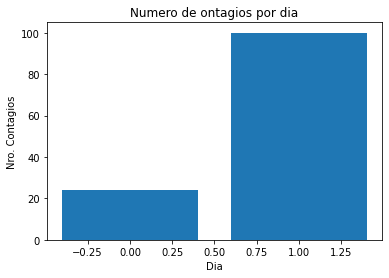

In [8]:
contador=0
contagios=[]
lasHoras={}

class Universidad(object):
    
    def __init__(self, environment, PROBABILIDAD_CONTAGIO, AFORO, TIEMPO_SIMULACION):
        self.env=environment
        self.aforo = simpy.Resource(environment, AFORO)
        self.probabilidadContagio = PROBABILIDAD_CONTAGIO 
        
    def estanciaEnUniversidad(self, vehiculo):
        tiempo=random.randint(60,360)
        yield self.env.timeout(tiempo)
        return tiempo

def llegada_estudiantes(env, nombre, universidad):
    global contador
    # print('Llega %s: a la hora %.2f.' % (nombre, env.now))

    with universidad.aforo.request() as aforo:

        yield aforo

        # print('Entra %s a la hora %.2f.' % (nombre, env.now))
        tEst=yield env.process(universidad.estanciaEnUniversidad(nombre))
        # print(tEst)
        if tEst in lasHoras.keys():
            lasHoras[tEst]+=1
        else:
            lasHoras[tEst]=1

        # print('El %s salio a las %.2f.' % (nombre, env.now))
        # print(lasHoras)

def poner_contagios_porDia(lasHoras, PROBABILIDAD_CONTAGIO):
    contadorContagios=0
    for k in list(lasHoras.keys()):
        bernoulli = stats.bernoulli(PROBABILIDAD_CONTAGIO)
        contagios=bernoulli.rvs(lasHoras[k])
        # print(k)
        if k>=60 and k<120:
            bernoulli = stats.bernoulli(PROBABILIDAD_CONTAGIO)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=120 and k<180:
            a=PROBABILIDAD_CONTAGIO+0.1
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=180 and k<240:
            a=PROBABILIDAD_CONTAGIO+0.2
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=240 and k<300:
            a=PROBABILIDAD_CONTAGIO+0.3
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=300 and k<360:
            a=PROBABILIDAD_CONTAGIO+0.4
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=360 and k<420:
            # print('hola')
            a=PROBABILIDAD_CONTAGIO+0.5
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        for c in contagios:
            if c == 1:
                contadorContagios+=1
    return contadorContagios

def ejecutar_simulacion(env,PROBABILIDAD_CONTAGIO, AFORO, TIEMPO_SIMULACION):
    universidad=Universidad(env,PROBABILIDAD_CONTAGIO, AFORO, TIEMPO_SIMULACION)
    global contador
    global lasHoras
    
    i=0
    while True:
        i+=1
        yield env.timeout(1)
        env.process(llegada_estudiantes(env, 'estudiante '+str(i), universidad))
        contagiosDia=poner_contagios_porDia(lasHoras, PROBABILIDAD_CONTAGIO)
        if i==360:
            contagios.append(contagiosDia)
            lasHoras={}
            i=0
        # contagios.append(contador)
        

print('Ingreso a clases UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, PROBABILIDAD_CONTAGIO, AFORO, TIEMPO_SIMULACION))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(contagios)
print(len(contagios))
print(lasHoras)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(list(range(len(contagios))))
valores = list(contagios)
plt.bar(etiqueta, valores, align="center")
plt.title("Numero de ontagios por dia")
plt.xlabel("Dia")
plt.ylabel("Nro. Contagios")
plt.show()